In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import scipy as sp

In [12]:
df=pd.read_csv("cardekho_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df["Owner"].nunique()

3

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(2)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

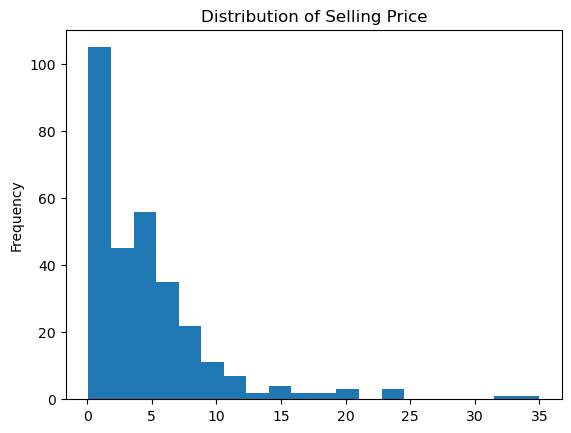

In [22]:
import matplotlib.pyplot as plt

df["Selling_Price"].plot(kind="hist", bins=20, title="Distribution of Selling Price")
plt.show()


In [23]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
fuel_type_avg_price= df.groupby("Fuel_Type")["Selling_Price"].mean()

In [25]:
fuel_type_avg_price.reset_index()

,Fuel_Type,Selling_Price
0,CNG,3.100000
1,Diesel,10.102759
2,Petrol,3.264184


In [26]:
fuel_type_avg_price.sort_values(ascending=False).head(1)

Fuel_Type
Diesel    10.102759
Name: Selling_Price, dtype: float64

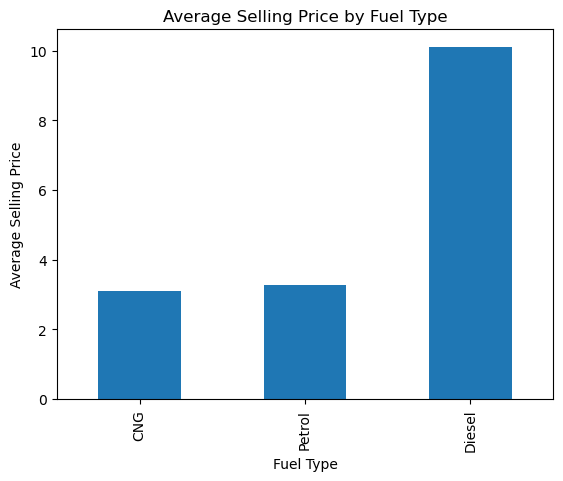

In [27]:
fuel_type_avg_price.sort_values(ascending=True).plot(kind="bar", title= "Average Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

In [28]:
transmission_counts= df["Transmission"].value_counts()

In [29]:
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

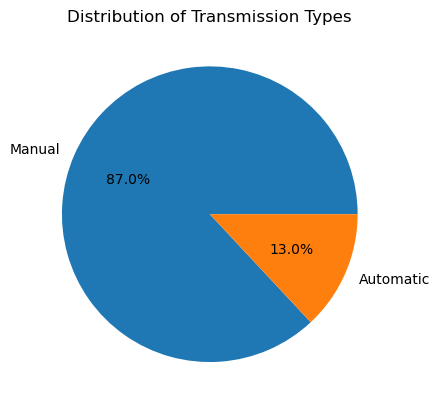

In [30]:
transmission_counts.plot(kind= "pie", autopct= "%1.1f%%", title="Distribution of Transmission Types")
plt.ylabel("")
plt.show()

In [31]:
seller_type_total_present_price= df.groupby("Seller_Type")["Present_Price"].sum()

In [32]:
yearly_avg_kms_driven = df.groupby("Year")["Kms_Driven"].mean()


In [33]:
sorted_result = yearly_avg_kms_driven.sort_values(ascending=False)


In [34]:
print(sorted_result)


Year
2004    135154.000000
2008    112128.571429
2005    104294.000000
2003     94500.000000
2006     87422.250000
2009     67820.500000
2010     60014.066667
2007     51000.000000
2012     43798.217391
2013     41534.333333
2011     40327.368421
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64


In [35]:
fuel_trans_max_selling_price = df.groupby(
    ["Fuel_Type", "Transmission"]
)["Selling_Price"].max()


In [36]:
seller_type_total_present_price= df.groupby("Seller_Type")["Present_Price"].sum()
yearly_avg_kms_driven = df.groupby("Year")["Kms_Driven"].mean()
sorted_result = yearly_avg_kms_driven.sort_values(ascending=False)
print(sorted_result)




Year
2004    135154.000000
2008    112128.571429
2005    104294.000000
2003     94500.000000
2006     87422.250000
2009     67820.500000
2010     60014.066667
2007     51000.000000
2012     43798.217391
2013     41534.333333
2011     40327.368421
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64


In [37]:
fuel_trans_max_selling_price.to_frame().reset_index()


,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


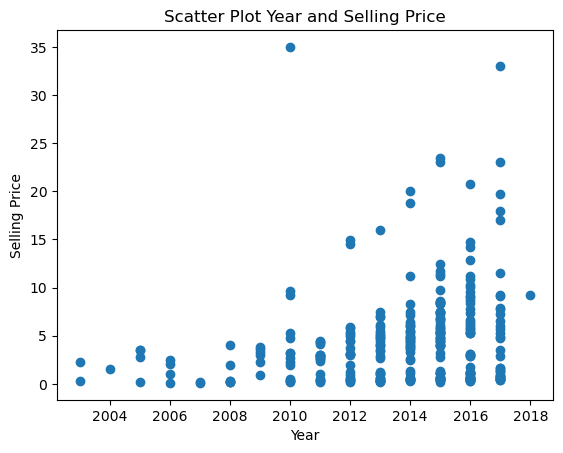

In [38]:
plt.scatter(df["Year"], df["Selling_Price"])
plt.title("Scatter Plot Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


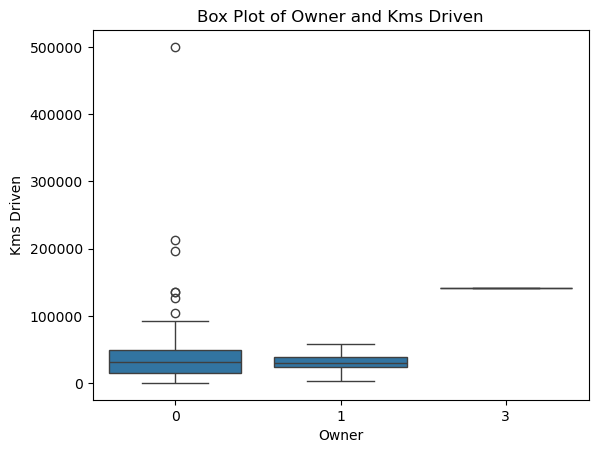

In [39]:
sns.boxplot(x="Owner", y="Kms_Driven", data =df)
plt.title("Box Plot of Owner and Kms Driven")
plt.xlabel("Owner")
plt.ylabel("Kms Driven")
plt.show()

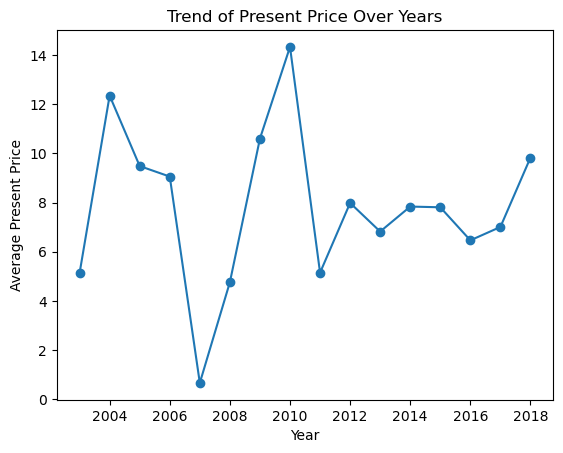

In [40]:
plt.plot(df.groupby("Year")["Present_Price"].mean(), marker="o")
plt.title("Trend of Present Price Over Years")
plt.xlabel("Year")
plt.ylabel("Average Present Price")
plt.show()

<Axes: xlabel='Fuel_Type'>

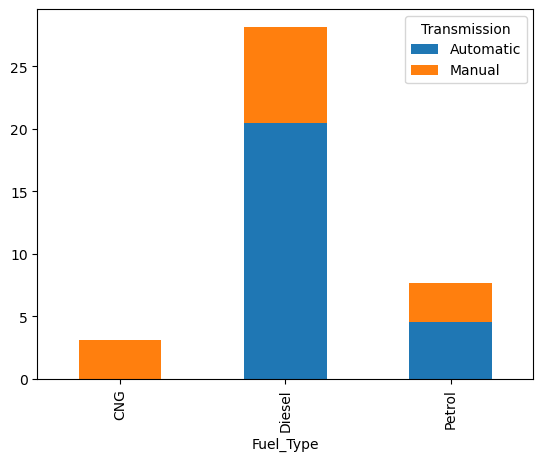

In [41]:
df.groupby(["Fuel_Type","Transmission"])["Selling_Price"].mean().unstack().plot(kind="bar", stacked=True)

Text(0, 0.5, 'Average kms Driven')

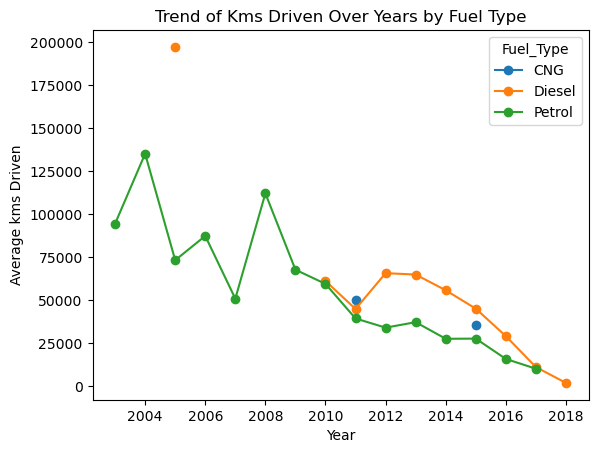

In [42]:
df.groupby(["Year","Fuel_Type"])["Kms_Driven"].mean().unstack().plot(kind="line", marker="o")
plt.title("Trend of Kms Driven Over Years by Fuel Type")
plt.xlabel("Year")
plt.ylabel("Average kms Driven")

In [43]:
df.groupby(["Year","Fuel_Type"])["Kms_Driven"].mean().unstack()

Fuel_Type,CNG,Diesel,Petrol
Year,,,
2003,NaN,NaN,94500.000000
2004,NaN,NaN,135154.000000
2005,NaN,197176.000000,73333.333333
2006,NaN,NaN,87422.250000
2007,NaN,NaN,51000.000000
2008,NaN,NaN,112128.571429
2009,NaN,NaN,67820.500000
2010,NaN,61256.000000,59562.454545
2011,49998.0,45000.000000,39483.647059


In [44]:
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [45]:
y= df['Selling_Price']

In [46]:
X=df[["Year", "Kms_Driven", "Fuel_Type","Transmission","Owner"]]


In [47]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,Petrol,Manual,0
1,2013,43000,Diesel,Manual,0
2,2017,6900,Petrol,Manual,0
3,2011,5200,Petrol,Manual,0
4,2014,42450,Diesel,Manual,0
...,...,...,...,...,...
296,2016,33988,Diesel,Manual,0
297,2015,60000,Petrol,Manual,0
298,2009,87934,Petrol,Manual,0
299,2017,9000,Diesel,Manual,0


In [48]:
# First, make sure the labelencoder is imported
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Check if the column exists before transforming
if "Fuel_Type" in X.columns:
    X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
else:
    print("Column 'Fuel_Type' not found in DataFrame")

# Check if the column exists before transforming
if "Transmission" in X.columns:
    X["Transmission"] = labelencoder.fit_transform(X["Transmission"])
else:
    print("Column 'Transmission' not found in DataFrame")
    
# Alternative: If the column name might be different, print available columns
# print("Available columns:", X.columns.tolist())

C:\Users\deepo\AppData\Local\Temp\ipykernel_14072\3132277002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
C:\Users\deepo\AppData\Local\Temp\ipykernel_14072\3132277002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"] = labelencoder.fit_transform(X["Transmission"])


In [49]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
...,...,...,...,...,...
296,2016,33988,1,1,0
297,2015,60000,2,1,0
298,2009,87934,2,1,0
299,2017,9000,1,1,0


In [50]:
# First, define X and y before using train_test_split
# For example, if you're working with a dataset:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (example)
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)  # Features
# y = df['target_column']               # Target variable

# Or create sample data for demonstration
import numpy as np

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Train
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

# Predict using SAME X_test
predictions = lr.predict(scaled_X_test)

# Results function
def modelresults(predictions):
    print("Mean absolute error is {}".format(
        mean_absolute_error(y_test, predictions)
    ))
    print("Root mean squared error is {}".format(
        np.sqrt(mean_squared_error(y_test, predictions))
    ))

# Call function
modelresults(predictions)

Mean absolute error is 3.127527731480448
Root mean squared error is 4.591531113271233


In [72]:
from sklearn.svm  import SVR

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
svrmodel =SVR()

In [77]:
param_gridsvr ={"C" : [0.1,0.5], "kernel" : ["linear","rbf","poly"],"degree":[2,3,4]}

In [79]:
gridsvr= GridSearchCV(svrmodel, param_gridsvr)

In [80]:
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [81]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'poly'}

In [82]:
predsgridsvr= gridsvr.predict(scaled_X_test)

In [83]:
modelresults(predsgridsvr)

Mean absolute error is 3.818176095067541
Root mean squared error is 6.469240120337171


In [84]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfrmodel= RandomForestRegressor()
param_gridrfr= {"max_depth": [5,10],"n_estimators":[2,5,8]}
gridrfr=GridSearchCV(rfrmodel, param_gridrfr)
gridrfr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [88]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 8}

In [89]:
predsgridrfr=gridrfr.predict(scaled_X_test)

In [90]:
modelresults(predsgridrfr)

Mean absolute error is 2.4698644695435115
Root mean squared error is 3.4115546236227035
